# Random Forests
## Diabetes Dataset
Predict whether a patient has diabetes (1) or not (0) based on features like glucose level, BMI, etc.

In [1]:
# Import necessary libraries
import seaborn as sns  # For loading the Titanic dataset and visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import classification_report, accuracy_score  # For evaluating the model
import matplotlib.pyplot as plt  # For data visualization
from sklearn.tree import plot_tree  # For visualizing individual trees in the Random Forest

In [2]:

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Drop rows with missing values to simplify processing
titanic = titanic.dropna()

# Select relevant features for prediction
X = titanic[['pclass', 'age', 'fare', 'sex']]

# Convert categorical 'sex' feature into numerical format
# Male = 0, Female = 1
X['sex'] = X['sex'].map({'male': 0, 'female': 1})

# Define the target variable (whether the passenger survived or not)
y = titanic['survived']


C:\Users\apurv\AppData\Local\Temp\ipykernel_25124\1047137560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})


In [3]:

# Split the dataset into training and testing sets
# 70% for training, 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:

# Create a Random Forest classifier with 100 trees
# Random state ensures reproducibility

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:

# Make predictions on the test data
y_pred = rf.predict(X_test)


In [6]:

# Evaluate the model's performance using a classification report
# The report includes precision, recall, and F1-score

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.79      0.82      0.81        33

    accuracy                           0.76        55
   macro avg       0.75      0.75      0.75        55
weighted avg       0.76      0.76      0.76        55



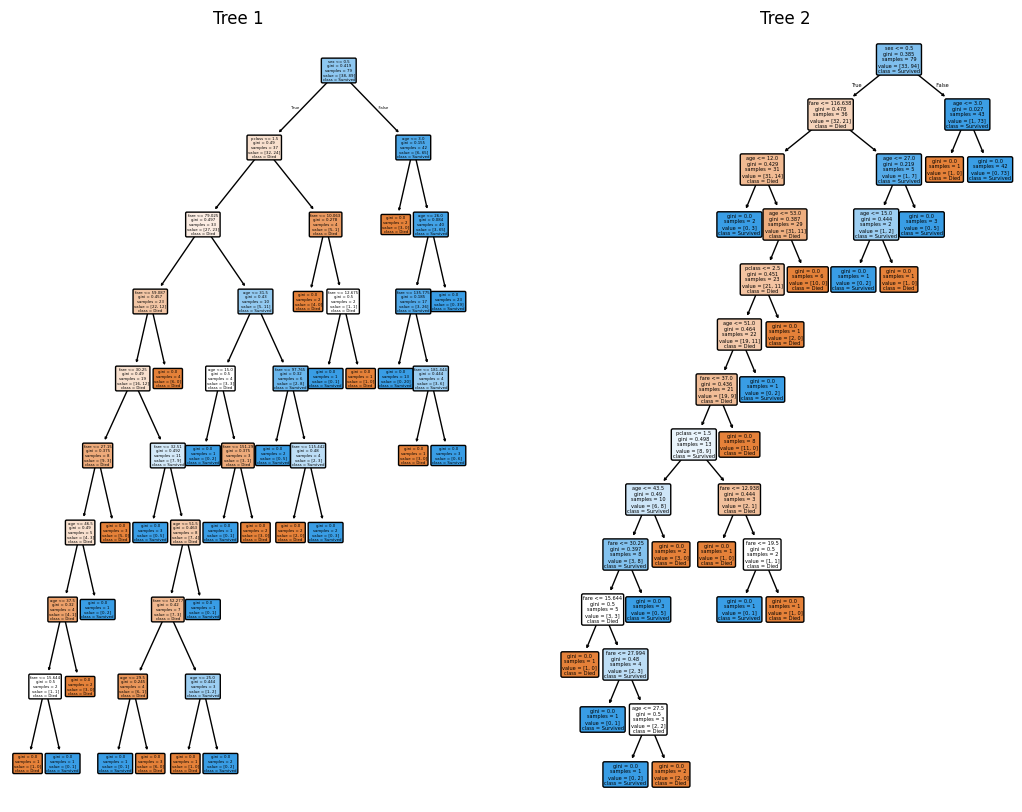

In [7]:
# Visualize individual trees from the Random Forest
plt.figure(figsize=(20, 10))
for i, tree_in_forest in enumerate(rf.estimators_[:2]):  # Plot the first 3 trees
    plt.subplot(1, 3, i + 1)
    plot_tree(tree_in_forest, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True, rounded=True)
    plt.title(f"Tree {i + 1}")
plt.show()